# Install and import Dependencies

In [82]:
#Run only once per session
!pip install neuralprophet[live]

In [83]:
import pandas as pd
from neuralprophet import NeuralProphet

# Fetch and prepare dataset

In [84]:
dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,465094,465094,465094,465094,466669,467058,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10086,10092,10097,10101,10102,10103,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,102

 The data has some columns in the 'Province/State' column that should be combined into one country's column.
 Also need to drop Lat and Long column since they're not useful for this task.

In [85]:
dataset=dataset.groupby('Country/Region').sum()
dataset=dataset.drop(columns=['Lat','Long'])
dataset

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,465094,465094,465094,465094,466669,467058,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10086,10092,10097,10101,10102,10103,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585


Rotate data so that Countries are column names and dates are just rows

In [86]:
dates=dataset.columns
dataset=dataset.transpose().reset_index(drop=True)
dates=pd.DataFrame(dates)
rotated_dataset= pd.concat([dates, dataset.diff()], axis=1, join='inner')
rotated_dataset=rotated_dataset.rename(columns={0:'Date'})
rotated_dataset

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,669.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,1/20/22,233.0,2383.0,1552.0,2313.0,441.0,0.0,129709.0,621.0,63941.0,1833.0,1186.0,144.0,3308.0,10888.0,559.0,1618.0,67448.0,814.0,0.0,88.0,20860.0,2969.0,4059.0,169786.0,0.0,8932.0,21.0,128.0,83.0,0.0,37.0,0.0,15775.0,190.0,0.0,13865.0,100.0,30506.0,0.0,...,5.0,1472.0,7107.0,10308.0,48.0,61.0,8282.0,20.0,157447.0,827.0,879.0,0.0,792.0,41374.0,39795.0,41.0,36.0,0.0,0.0,8640.0,0.0,120.0,0.0,1063.0,12698.0,71843.0,645429.0,251.0,18821.0,3014.0,108124.0,12997.0,1307.0,0.0,2086.0,16715.0,1259.0,58.0,799.0,665.0
730,1/21/22,213.0,2670.0,1855.0,824.0,456.0,74.0,118171.0,628.0,43166.0,25418.0,1068.0,222.0,3616.0,11434.0,549.0,1836.0,54478.0,794.0,0.0,141.0,9590.0,2574.0,0.0,171321.0,80.0,9874.0,0.0,83.0,0.0,287.0,42.0,4447.0,15822.0,0.0,0.0,17682.0,74.0,31039.0,9.0,...,5.0,10264.0,8190.0,9860.0,0.0,0.0,3519.0,26.0,141095.0,840.0,0.0,0.0,715.0,42295.0,38002.0,40.0,68.0,0.0,0.0,8112.0,0.0,0.0,0.0,1259.0,9787.0,72555.0,879980.0,286.0,20542.0,2921.0,96424.0,12874.0,1321.0,0.0,2318.0,15935.0,1240.0,78.0,616.0,409.0
731,1/22/22,32.0,2230.0,2211.0,0.0,226.0,116.0,98146.0,940.0,67182.0,46669.0,1614.0,84.0,3162.0,9614.0,415.0,1964.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,165110.0,18.0,6630.0,79.0,144.0,0.0,78.0,44.0,0.0,8039.0,102.0,0.0,15

In [97]:
data=rotated_dataset[['Date','US']]
data.columns=['ds','y']
data=data.dropna()
data

,ds,y
1,1/23/20,0.0
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
5,1/27/20,0.0
...,...,...
729,1/20/22,645429.0
730,1/21/22,879980.0
731,1/22/22,286034.0
732,1/23/22,204804.0


In [102]:
m = NeuralProphet(daily_seasonality=True)
m.fit(data,freq='D',epochs=1000)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO:NP.config:Auto-set batch_size to 16


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.15E-01, min: 9.81E-01
INFO:NP.utils_torch:lr-range-test results: steep: 1.15E-01, min: 9.81E-01


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.72E-02, min: 5.39E-01
INFO:NP.utils_torch:lr-range-test results: steep: 9.72E-02, min: 5.39E-01


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.92E-02, min: 7.59E-01
INFO:NP.utils_torch:lr-range-test results: steep: 8.92E-02, min: 7.59E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.00E-01
INFO:NP.forecaster:lr-range-test selected learning rate: 1.00E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:32<00:00, 10.84it/s, SmoothL1Loss=0.0323, MAE=3.43e+4, RMSE=5.71e+4, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.828445,307308.423943,388203.307512,0.0
1,0.770633,291556.257781,370871.681233,0.0
2,0.713786,276154.163327,350706.973056,0.0
3,0.656807,260463.135083,329418.062798,0.0
4,0.601801,244828.547237,313073.245012,0.0
...,...,...,...,...
995,0.032338,34259.364871,56651.573974,0.0
996,0.032336,34259.413063,57266.292836,0.0
997,0.032335,34258.160170,56499.411137,0.0
998,0.032335,34257.297818,57400.018577,0.0


In [99]:
future=m.make_future_dataframe(data,periods=14)
forecast=m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2022-01-25,None,658926.9375,NaN,482882.87500,172303.640625,3740.470703
1,2022-01-26,None,665343.0625,NaN,485195.03125,169633.781250,10514.239258
2,2022-01-27,None,663704.9375,NaN,487507.31250,166585.265625,9612.381836
3,2022-01-28,None,675899.5000,NaN,489819.37500,163197.703125,22882.421875
4,2022-01-29,None,627982.3125,NaN,492131.62500,159512.078125,-23661.445312
5,2022-01-30,None,616314.2500,NaN,494443.90625,155570.187500,-33699.851562
6,2022-01-31,None,658782.4375,NaN,496756.18750,151414.437500,10611.785156
7,2022-02-01,None,649896.3750,NaN,499068.37500,147087.531250,3740.470703
8,2022-02-02,None,654526.8750,NaN,501380.65625,142632.031250,10514.239258
9,2022-02-03,None,651395.2500,NaN,503692.68750,138090.171875,9612.381836


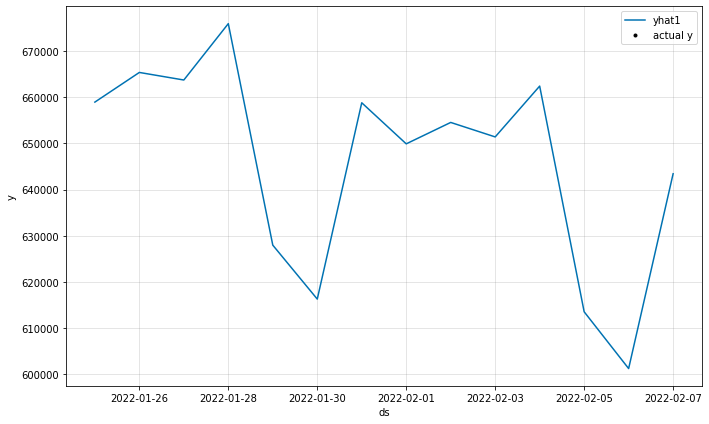

In [100]:
fig1 = m.plot(forecast)